# Gramener Case Study

## Introduction
Solving this case study will give you an idea about how real business problems are solved using EDA. 
In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a 
basic understanding of risk analytics in banking and financial services and understand how data is used to 
minimise the risk of losing money while lending to customers.

## Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

        If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

        If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

  Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed.
             These candidates are not labelled as 'defaulted'.

    Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has 
                 defaulted on the loan 

  Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since
                 the loan was rejected, there is no transactional history of those applicants with the company and so
                 this data is not available with the company (and thus in this dataset)
 

## Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough)

## Results Expected

Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
Present the overall approach of the analysis in a presentation 
Mention the problem statement and the analysis approach briefly 
Explain the results of univariate, bivariate analysis etc. in business terms
Include visualisations and summarise the most important results in the presentation
 
You need to submit one Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Data Understanding

In [2]:
# Looks like the below warning is related to Python trying to interpret the data type and with more of columns having mixed type
loan_data = pd.read_csv("D:/Upgrad/Loan Management/loan.csv")

C:\Users\gopal.ratakonda\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# 111 columns and 39716 data rows
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning

#### Drop all columns with all values are NA.

In [4]:
print("Dataframe before dropping \"NA\" columns : ", loan_data.shape)
loan_data = loan_data.dropna(axis=1, how='all')
print('\nOut of 111 columns 54 columns were having only NULL values and those columns were dropped from original data frame')
print("\nDataframe after dropping \"NA\" columns : ", loan_data.shape)

Dataframe before dropping "NA" columns :  (39717, 111)

Out of 111 columns 54 columns were having only NULL values and those columns were dropped from original data frame

Dataframe after dropping "NA" columns :  (39717, 57)


#### Drop columns with atleast 90% NA.

In [5]:
#Find the percentage of null values in each column if the value greater than 90%
loan_data.columns[round(100*(loan_data.isnull().sum()/len(loan_data.index)),2)>90]

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')

The following columns are having large number of null values, may not be helpful for analysis purposes.

next_pymnt_d                
mths_since_last_record        


In [6]:
print("Dataframe before dropping 2 columns : ", loan_data.shape)
loan_data = loan_data.drop(columns=['next_pymnt_d','mths_since_last_record'])
print("Dataframe after dropping 2 columns : ", loan_data.shape)


Dataframe before dropping 2 columns :  (39717, 57)
Dataframe after dropping 2 columns :  (39717, 55)


### Datatypes manipulation
int_rate & revol_util columns are classified as data type of Object, should be numeric. Drop % for calculations.

In [7]:
loan_data.int_rate = loan_data.int_rate.str[:-1].astype(float)
loan_data.revol_util = loan_data.revol_util.str[:-1].astype(float)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

### Remove columns with same/single value or not required for data analysis
        1. pymnt_plan column having only 'n' as a value, not required
        2. url - Not a field of interest for Data Analysis
        3. desc - This field contains descriptive data, not required
        4. initial_list_status having only one value "f", not useful for analysis
        5. Policy Code having only one value "1"
        6. Application Type "Individual" - This loan dataset doesn't contain joint applicant data, hence not useful
        7. tax_liens - All the values are 0
        8. delinq_amnt - All the values are 0
        9. acc_now_delinq - All the values are 0
        10. chargeoff_within_12_mths - All the values are 0

In [8]:
loan_data = loan_data.drop(columns=['pymnt_plan','url','desc','initial_list_status','policy_code','application_type' , 'tax_liens' ,
                                'delinq_amnt', 'acc_now_delinq' ,'chargeoff_within_12_mths' ,'collections_12_mths_ex_med'])

In [9]:
# Convert scientific notation to number format for better reading - for example, annual income
pd.options.display.float_format = '{:.2f}'.format
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,...,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39020.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,12.02,324.56,68968.93,13.32,0.15,...,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.04
std,210694.13,265678.31,7456.67,7187.24,7128.45,3.72,208.87,63793.77,6.68,0.49,...,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.20
min,54734.00,70699.00,500.00,500.00,0.00,5.42,15.69,4000.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,516221.00,666780.00,5500.00,5400.00,5000.00,9.25,167.02,40404.00,8.17,0.00,...,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00
50%,665665.00,850812.00,10000.00,9600.00,8975.00,11.86,280.22,59000.00,13.40,0.00,...,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,14.59,430.78,82300.00,18.60,0.00,...,0.00,16534.43,15798.81,13653.26,2833.40,0.00,0.00,0.00,3293.16,0.00
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,24.59,1305.19,6000000.00,29.99,11.00,...,6307.37,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,2.00


####  Create a derived column IsDefaulted 
    - With value 0 or 1 which will be used as a primary column to identify patterns for defaulted.


In [10]:
# Default is defaulted to zero and update to 1 for for the loan status "Charged Off"
loan_data['is_defaulted']=0
loan_data.loc[loan_data['loan_status']=='Charged Off','is_defaulted']=1

In [11]:
loan_data.groupby('is_defaulted')['is_defaulted'].count()

is_defaulted
0    34090
1     5627
Name: is_defaulted, dtype: int64

## 3. Data Analysis

#### Based on the data dictionary, identified the following variables are more related to identify Deafult users

### Default Rate vs. Non Default Rate

Text(0.5,0,'Loan Default Status')

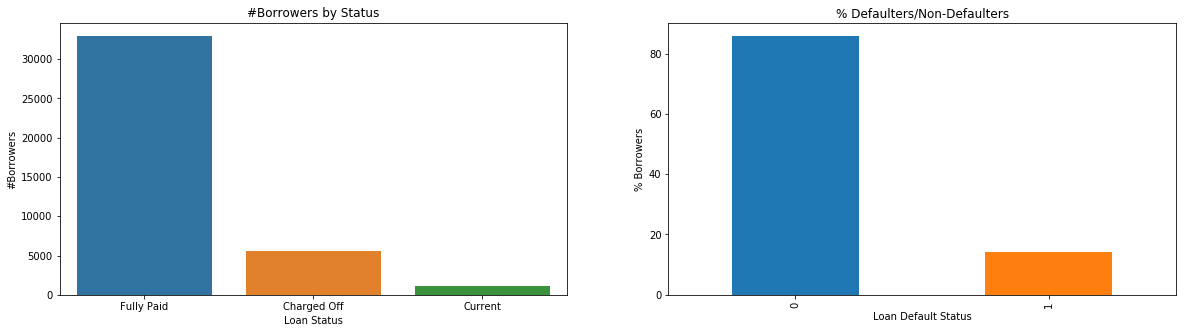

In [12]:
#Plot based on loan status
plt.figure(figsize=(20, 5))

plt.subplot(121)
sns.countplot(x='loan_status', data=loan_data )
plt.title('#Borrowers by Status', fontsize=12)
plt.xlabel('Loan Status')
plt.ylabel('#Borrowers')


plt.subplot(122)
((loan_data['is_defaulted'].value_counts()/len(loan_data))*100).plot.bar()
plt.title('% Defaulters/Non-Defaulters', fontsize=12)
plt.ylabel('% Borrowers')
plt.xlabel('Loan Default Status')


In [13]:
### Findings: Lending Club data shows that out of 39717 applicants, 14.17% of them defaulted their loan.
(loan_data['is_defaulted'].value_counts()/len(loan_data))*100

0   85.83
1   14.17
Name: is_defaulted, dtype: float64

# Univariate Analysis

### Debt. to Income Ratio (dti)

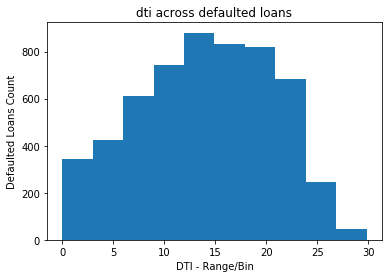

In [14]:
loan_data_chargedoff = loan_data[loan_data['is_defaulted']==1]
plt.hist(loan_data_chargedoff['dti'])
plt.title('dti across defaulted loans')
plt.ylabel('Defaulted Loans Count')
plt.xlabel('DTI - Range/Bin')
plt.show()


### Findings: 
    1. There are no defaulted loan applicants with the dti more than 30. Looks like lending club is providing loan 
    only for the applicants with less than 30 dti
    2. DTI between 7 to 25 seems to be defaulting more.

### Annual Income

count      5627.00
mean      62427.30
std       47776.01
min        4080.00
25%       37000.00
50%       53000.00
75%       75000.00
max     1250000.00
Name: annual_inc, dtype: float64

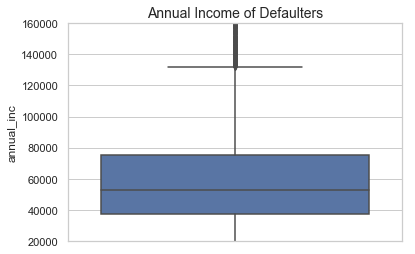

In [15]:
sns.set(style="whitegrid")
ax = sns.boxplot(y="annual_inc", data=loan_data_chargedoff, )
ax.set(ylim=(20000,160000))
plt.title('Annual Income of Defaulters', fontsize=14)
loan_data_chargedoff.describe()['annual_inc']

#### Findings: Most of the applicants is in the annual income range of 37k to 75k, with mean income of 62k

### Interest Rate

count   5627.00
mean      13.82
std        3.65
min        5.42
25%       11.31
50%       13.61
75%       16.40
max       24.40
Name: int_rate, dtype: float64

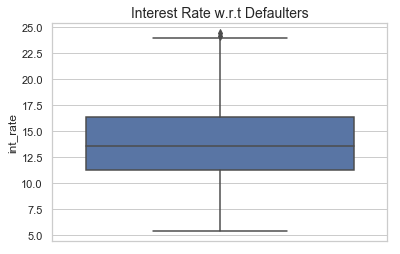

In [16]:
ax = sns.boxplot(y="int_rate", data=loan_data_chargedoff)
plt.title('Interest Rate w.r.t Defaulters', fontsize=14)
loan_data_chargedoff.describe()['int_rate']

#### Findings: Most of the loan applicants interest rate is between 11.31 % to 16.40 % with mean at 13%

### Open Accounts

count   5627.00
mean       9.18
std        4.53
min        2.00
25%        6.00
50%        8.00
75%       12.00
max       38.00
Name: open_acc, dtype: float64

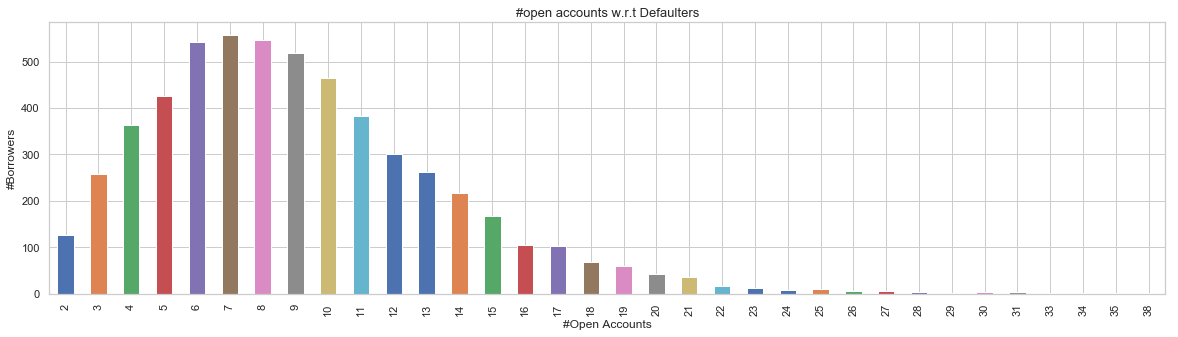

In [17]:
#Let's use line plot for the open accounts
loan_data_chargedoff['open_acc'].value_counts().sort_index().plot.bar(figsize=(20, 5))
plt.title('#open accounts w.r.t Defaulters', fontsize=13)
plt.ylabel('#Borrowers')
plt.xlabel('#Open Accounts')
loan_data_chargedoff.describe()['open_acc']

#### Findings: Most of the applicants have 6 to 12 open accounts, with median of 9 accounts.

### Loan Amount

count    5627.00
mean    12104.39
std      8085.73
min       900.00
25%      5600.00
50%     10000.00
75%     16500.00
max     35000.00
Name: loan_amnt, dtype: float64

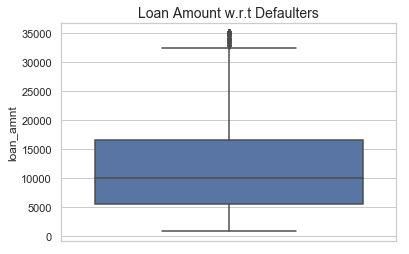

In [18]:
ax = sns.boxplot(y="loan_amnt", data=loan_data_chargedoff)
plt.title('Loan Amount w.r.t Defaulters', fontsize=14)
loan_data_chargedoff.describe()['loan_amnt']

#### Findings: Most of the defaulted applicants have loan amount from 5k to 16k , with mean at 12k

### Revolving Balance

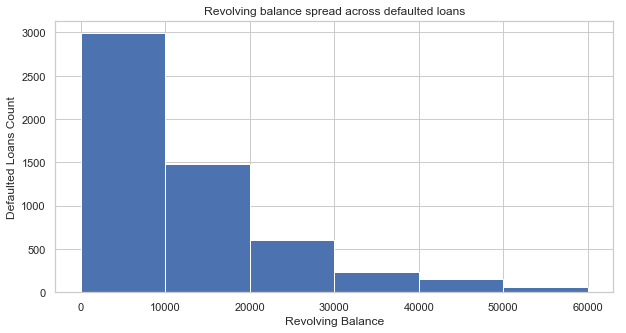

In [19]:
# Univariate analysis with revolving balance spread across defaulted loans
plt.figure(figsize=(10,5))
plt.hist(loan_data_chargedoff['revol_bal'],bins=[0,10000,20000,30000,40000,50000,60000])
plt.title('Revolving balance spread across defaulted loans')
plt.ylabel('Defaulted Loans Count')
plt.xlabel('Revolving Balance')
plt.show()

###  Loan Term -  Defaulted

Text(0,0.5,'No of Borrowers')

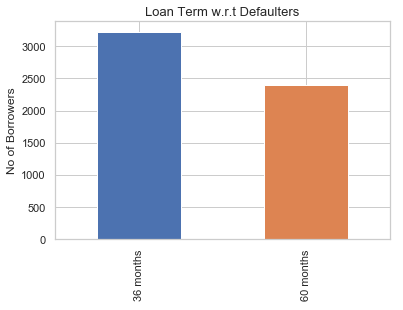

In [20]:
loan_data_chargedoff['term'].value_counts().plot.bar()
plt.title('Loan Term w.r.t Defaulters', fontsize=13)
plt.ylabel('No of Borrowers')

### Employment Length - Defaulted

Text(0,0.5,'No of Borrowers')

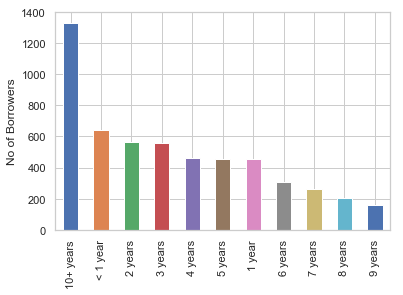

In [21]:
loan_data_chargedoff['emp_length'].value_counts().plot.bar()
plt.ylabel('No of Borrowers')

### Grade & Sub Grade  - Defaulted

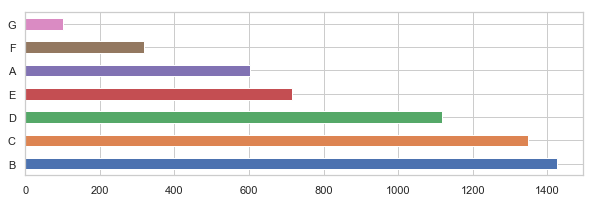

In [22]:
fig = plt.figure(figsize=(10,3))
loan_data_chargedoff['grade'].value_counts().plot.barh()

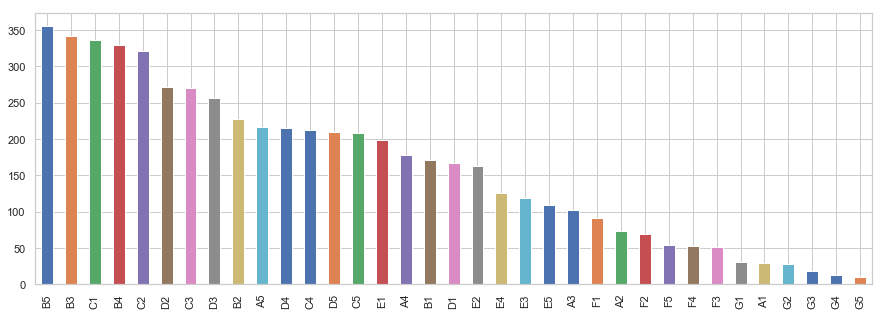

In [23]:
fig = plt.figure(figsize=(15,5))
loan_data_chargedoff['sub_grade'].value_counts().plot.bar()

### Purpose of Loan

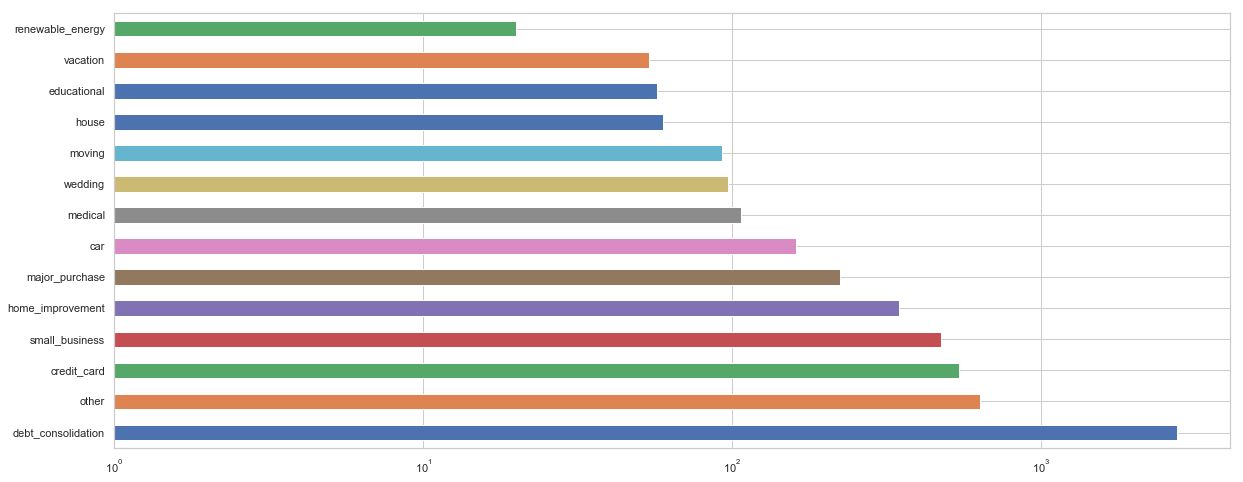

In [24]:
fig = plt.figure(figsize=(20,8))
loan_data_chargedoff['purpose'].value_counts().plot.barh(log = True)

### Home Ownership

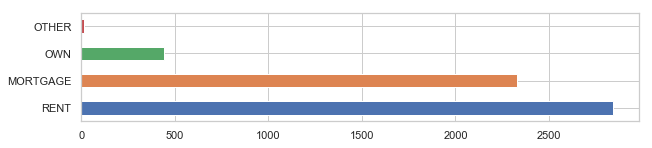

In [25]:
fig = plt.figure(figsize=(10,2))
loan_data_chargedoff['home_ownership'].value_counts().plot.barh()

###  Verification Status

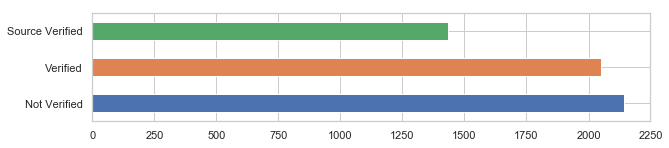

In [26]:
fig = plt.figure(figsize=(10,2))
loan_data_chargedoff['verification_status'].value_counts().plot.barh()

###  Loan Applicant's State - Demo Graphic Category variable

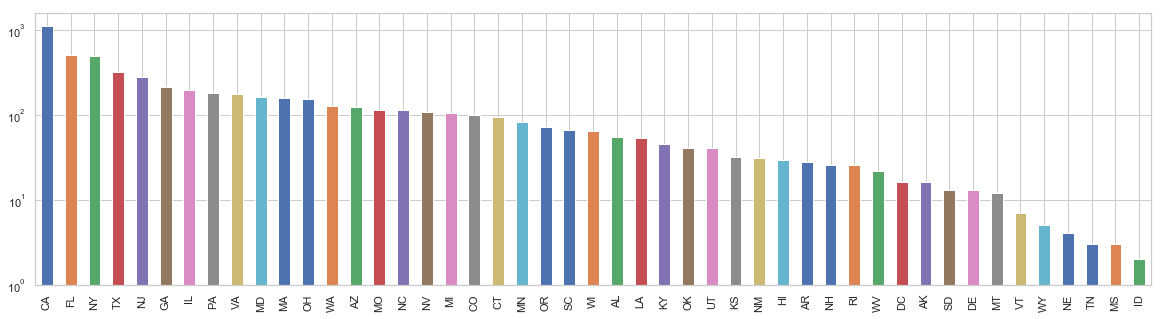

In [27]:
fig = plt.figure(figsize=(20,5))
loan_data_chargedoff['addr_state'].value_counts().plot.bar(log=True)

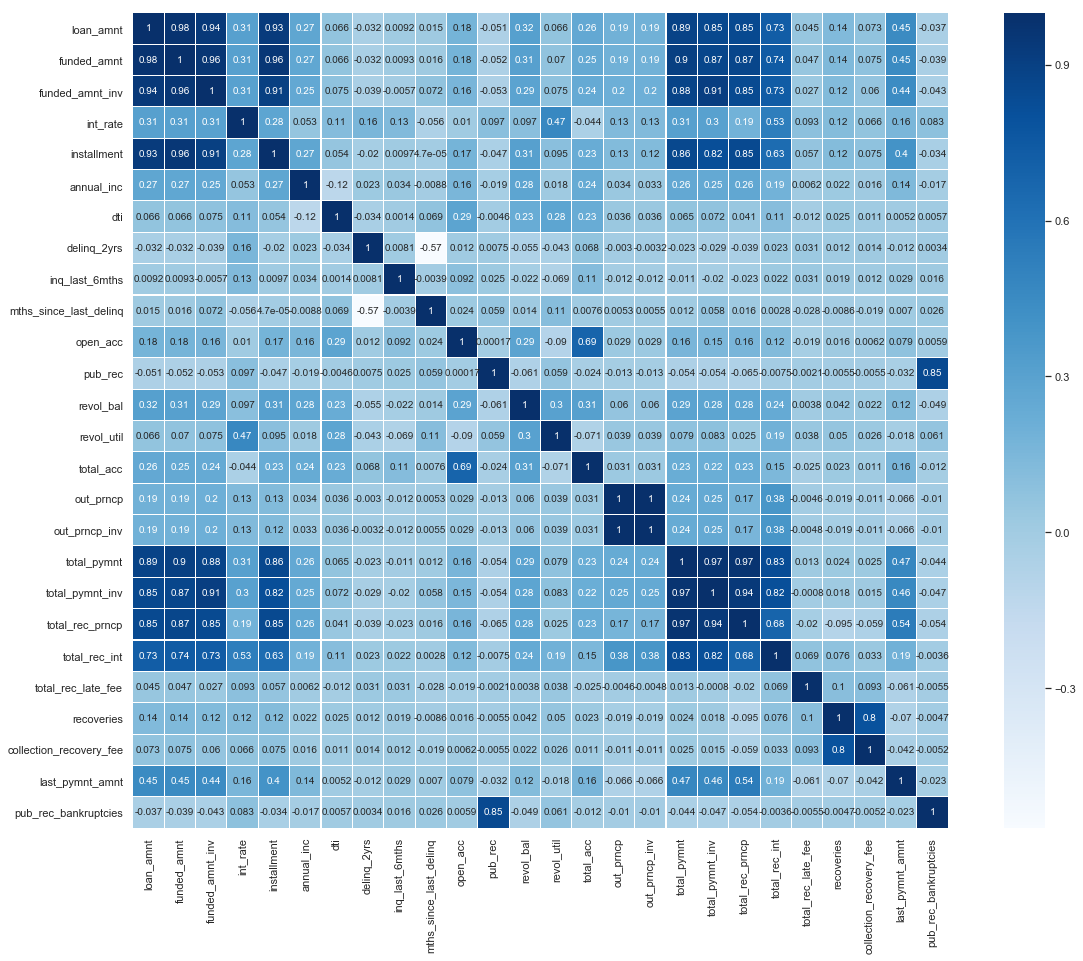

In [28]:
loan_data_corr = loan_data.drop(columns=['id','member_id','is_defaulted']) 
plt.figure(figsize=(20,15)) 
sns.heatmap(loan_data_corr.corr(),cmap='Blues', linewidths=0.1,vmax=1.0, square=True,  linecolor='white', annot=True, annot_kws={"size": 10}) 
plt.show()


### Findings:
#### 1. Loan Amount, Funded Amount and Funded Amount Invested are strongly correlated.
#### 2. Installment Amount is strongly correlated with the above variables
#### 3. Total Payment, Total Payment Invested and Total Received principles are strongly correlated.

#  Bivariate Analysis

###  Purpose of Loan against Defaulters vs. Non-Defaulters

In [29]:
loan_data_purpose=loan_data.pivot_table(index='purpose',columns='is_defaulted', values='id',aggfunc='count')
loan_data_purpose.columns = ['Non-Defaulted','Defaulted']
loan_data_purpose.reset_index()
loan_data_purpose['Default-Perc'] = (loan_data_purpose['Defaulted']/(loan_data_purpose['Defaulted'] + loan_data_purpose['Non-Defaulted']))*100
loan_data_purpose['NonDefault-Perc'] = (loan_data_purpose['Non-Defaulted']/(loan_data_purpose['Defaulted'] + loan_data_purpose['Non-Defaulted']))*100
loan_data_purpose = pd.DataFrame(loan_data_purpose.to_records())
loan_data_purpose

,purpose,Non-Defaulted,Defaulted,Default-Perc,NonDefault-Perc
0,car,1389,160,10.33,89.67
1,credit_card,4588,542,10.57,89.43
2,debt_consolidation,15874,2767,14.84,85.16
3,educational,269,56,17.23,82.77
4,home_improvement,2629,347,11.66,88.34
5,house,322,59,15.49,84.51
6,major_purchase,1965,222,10.15,89.85
7,medical,587,106,15.30,84.70
8,moving,491,92,15.78,84.22
9,other,3360,633,15.85,84.15


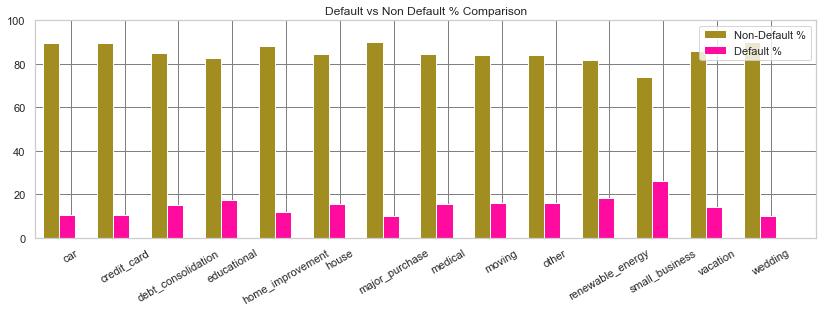

In [30]:
# Let's visualize with the another grouped bar chart
pos=list(range(len(loan_data_purpose)))
width=0.30

# plotting the bars
fig, ax = plt.subplots(figsize=(14,4))

#create a bar with defaulted vs. Non Defaulted ratio
plt.bar(pos, loan_data_purpose['NonDefault-Perc'], width,  color='#A28D20')
plt.bar([p + width for p in pos], loan_data_purpose['Default-Perc'],width, color='#FF0BA0') 

ax.set_title('Default vs Non Default % Comparison')
ax.set_xticks([p + 1.2 * width for p in pos])
ax.set_xticklabels(loan_data_purpose['purpose'],rotation='30')
ax.grid(b=True, which='major', color='Grey')

plt.xlim(min(pos)-width,max(pos)+width*4)
plt.ylim([0,100])

plt.legend(['Non-Default %','Default %'],loc='upper right')
plt.show()

### Findings: 
#### Purpose of loans with "Small Business", " Renewable Energy" and "Educational" seems to be high risk than other purposes.

### Number of open accounts for Defaulters

In [31]:
#Create a user defined function for number of open accounts

def OpenAccounts(x):
    if 0 <= x < 5:
        x = '0-04'
    elif 5 <= x < 10:
        x = '05-09'
    elif 10 <= x < 15:
        x = '10-14'
    elif 15 <= x < 20:
        x = '15-19'
    elif 20 <= x < 25:
        x = '20-24'
    elif 25 <= x < 30:
        x = '25-29'
    elif 30 <= x < 35:
        x = '30-34'
    elif 35 <= x < 40:
        x = '35-39'
    elif 40 <= x < 45:
        x = '40-44'
    elif 45 <= x < 50:
        x = '44-49'
    return x 

loan_data['Open_Accounts'] = loan_data['open_acc'].apply(OpenAccounts)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,is_defaulted,Open_Accounts
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,0,0-04
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,1,0-04
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,0,0-04
3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,0,10-14
4,1075358,1311748,3000,3000,3000.00,60 months,12.69,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00,0,15-19


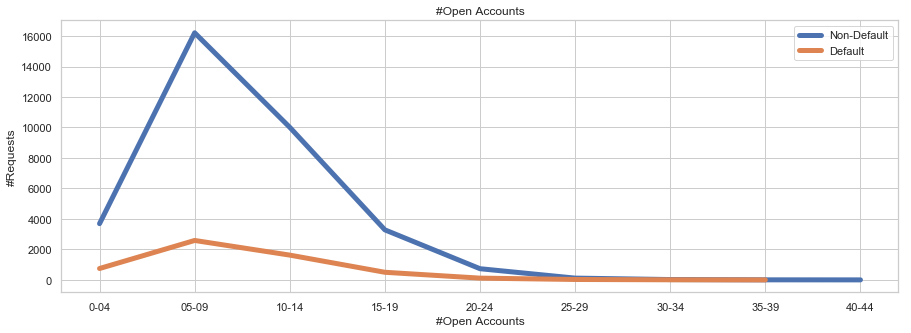

In [32]:
#Plot f or Open accounts w.r.t default / non-default

loan_data_openacc = loan_data.groupby(['Open_Accounts','is_defaulted'])['id'].count().unstack()
fig=plt.figure(figsize=(15,5))
plt.plot(loan_data_openacc,lw=5)
plt.title('#Open Accounts', fontsize=12)
plt.xlabel('#Open Accounts')
plt.ylabel('#Requests')
plt.legend(['Non-Default','Default'],loc='upper right')

### Findings:
#### The above plot shows that the number of charged-off or candidates who would default is high when the number of open accounts fall in the ranges of 5-9 & 10-14.

### Employment Length for Defaulters vs Non-Defaulters

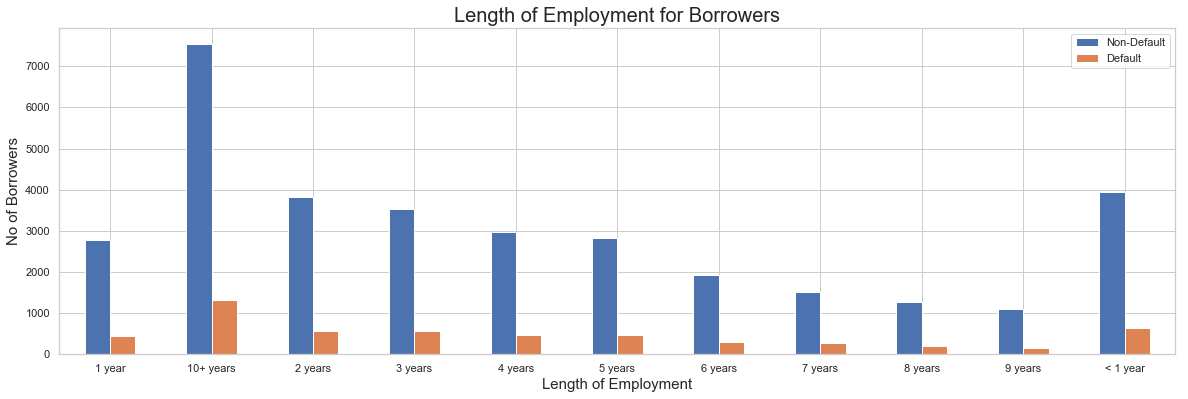

In [33]:
#Plot for employment length  w.r.t default / non-default

loan_data_emplen = loan_data.groupby(['emp_length','is_defaulted'])['id'].count().unstack()
loan_data_emplen.plot.bar(figsize = (20,6),rot=0)
plt.title('Length of Employment for Borrowers', fontsize=20)
plt.xlabel('Length of Employment',fontsize=15)
plt.ylabel('No of Borrowers',fontsize=15)
plt.legend(['Non-Default','Default'],loc='upper right')

The above plot shows that the number of borrowers who seems to default is high for 10+ years and for borrowers with employment legth of <= 1 year. Let us find the default percentage.

In [34]:
#Calculate the default percentage w.r.t employment length
loan_data_emplen = loan_data.groupby(['emp_length','is_defaulted'])['emp_length'].count().unstack()
loan_data_emplen.columns = ['Non-Defaulted','Defaulted']
loan_data_emplen['Default-Perc'] = (loan_data_emplen['Defaulted']/(loan_data_emplen['Defaulted'] + loan_data_emplen['Non-Defaulted']))*100
loan_data_emplen['Non-Default-Perc'] = (loan_data_emplen['Non-Defaulted']/(loan_data_emplen['Defaulted'] + loan_data_emplen['Non-Defaulted']))*100
loan_data_emplen = pd.DataFrame(loan_data_emplen.to_records())
loan_data_emplen

,emp_length,Non-Defaulted,Defaulted,Default-Perc,Non-Default-Perc
0,1 year,2784,456,14.07,85.93
1,10+ years,7548,1331,14.99,85.01
2,2 years,3821,567,12.92,87.08
3,3 years,3540,555,13.55,86.45
4,4 years,2974,462,13.45,86.55
5,5 years,2824,458,13.95,86.05
6,6 years,1922,307,13.77,86.23
7,7 years,1510,263,14.83,85.17
8,8 years,1276,203,13.73,86.27
9,9 years,1100,158,12.56,87.44


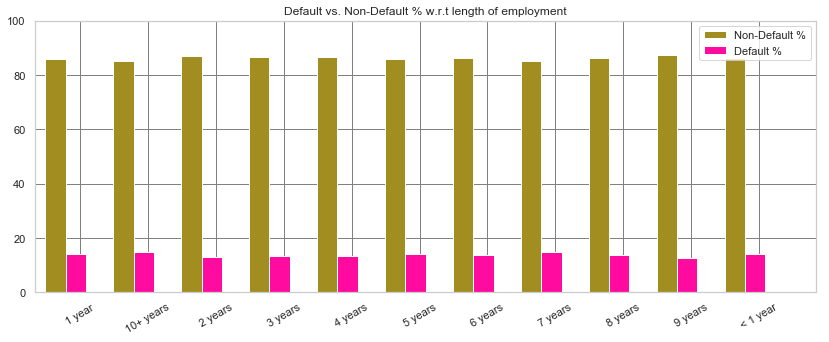

In [35]:
#Plot to show the default percentage for employment length

pos=list(range(len(loan_data_emplen)))
width=0.30

# plotting the bars
fig, ax = plt.subplots(figsize=(14,5))

width=0.30
plt.bar(pos, loan_data_emplen['Non-Default-Perc'], width,  color='#A28D20')
plt.bar([p + width for p in pos], loan_data_emplen['Default-Perc'],width, color='#FF0BA0') 

ax.set_title('Default vs. Non-Default % w.r.t length of employment')
ax.set_xticks([p + 1.2 * width for p in pos])
ax.set_xticklabels(loan_data_emplen['emp_length'],rotation='30')
ax.grid(b=True, which='major', color='Grey')

plt.xlim(min(pos)-width,max(pos)+width*4)
plt.ylim([0,100])

plt.legend(['Non-Default %','Default %'],loc='upper right')
plt.show()


### Credit Utilization

In [36]:
#Create a user defined function to define the range for credit utilization

def rev_util(x):
    if 0 <= x < 11:
        x = '0-10'
    elif 11 <= x < 21:
        x = '11-20'
    elif 21 <= x < 31:
        x = '21-30'
    elif 31 <= x < 41:
        x = '31-40'
    elif 41 <= x < 51:
        x = '41-50'
    elif 51 <= x < 61:
        x = '51-60'
    elif 61 <= x < 71:
        x = '61-70'
    elif 71 <= x < 81:
        x = '71-80'
    elif 81 <= x < 91:
        x = '81-90'
    elif 91 <= x < 100:
        x = '91-100'
    return x 

loan_data['Credit_Util'] = loan_data['revol_util'].apply(rev_util)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,is_defaulted,Open_Accounts,Credit_Util
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,0,0-04,81-90
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,1,0-04,0-10
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,0,0-04,91-100
3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,0,10-14,21-30
4,1075358,1311748,3000,3000,3000.00,60 months,12.69,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.00,0,15-19,51-60


In [37]:
loan_data_revutil = loan_data.groupby(['Credit_Util','is_defaulted'])['id'].count().unstack()
loan_data_revutil.columns = ['Non-Defaulted','Defaulted']
loan_data_revutil['Default-Perc'] = (loan_data_revutil['Defaulted']/(loan_data_revutil['Defaulted'] + loan_data_revutil['Non-Defaulted']))*100
loan_data_revutil['Non-Default-Perc'] = (loan_data_revutil['Non-Defaulted']/(loan_data_revutil['Defaulted'] + loan_data_revutil['Non-Defaulted']))*100
loan_data_revutil = pd.DataFrame(loan_data_revutil.to_records())
loan_data_revutil

,Credit_Util,Non-Defaulted,Defaulted,Default-Perc,Non-Default-Perc
0,0-10,4335,458,9.56,90.44
1,11-20,3070,336,9.86,90.14
2,21-30,3474,430,11.01,88.99
3,31-40,3612,511,12.39,87.61
4,41-50,3713,605,14.01,85.99
5,51-60,3699,641,14.77,85.23
6,61-70,3638,655,15.26,84.74
7,71-80,3282,714,17.87,82.13
8,81-90,2964,670,18.44,81.56
9,91-100,2269,591,20.66,79.34


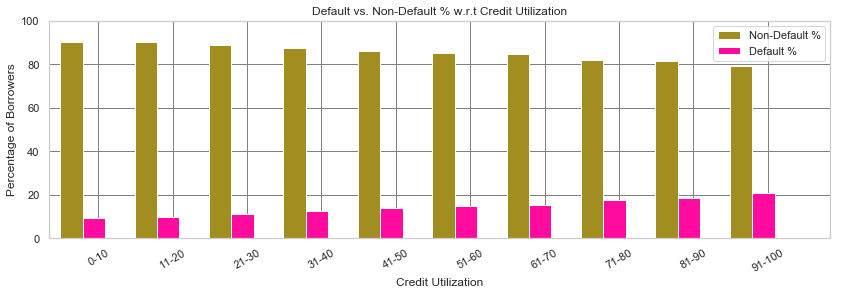

In [38]:
#Plot to show the default percentage for credit utilization
# Let's visualize with the another grouped bar chart
pos=list(range(len(loan_data_revutil)))
width=0.30

# plotting the bars
fig, ax = plt.subplots(figsize=(14,4))

width=0.30
plt.bar(pos, loan_data_revutil['Non-Default-Perc'], width,  color='#A28D20')
plt.bar([p + width for p in pos], loan_data_revutil['Default-Perc'],width, color='#FF0BA0') 

ax.set_title('Default vs. Non-Default % w.r.t Credit Utilization')
ax.set_xticks([p + 1.2 * width for p in pos])
ax.set_xticklabels(loan_data_revutil['Credit_Util'],rotation='30')
ax.grid(b=True, which='major', color='Grey')

plt.xlim(min(pos)-width,max(pos)+width*4)
plt.ylim([0,100])
plt.ylabel('Percentage of Borrowers')
plt.xlabel('Credit Utilization')
plt.legend(['Non-Default %','Default %'],loc='upper right')
plt.show()

### Loan Amount for Defaulters vs Non-Defaulters

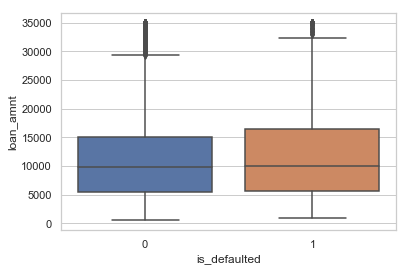

In [39]:
# boxplot of a loan amount against defaulter/non-defaulters
sns.boxplot(x= 'is_defaulted', y = 'loan_amnt' , data=loan_data)

plt.show()

The above plot gives us insight that borrowers who have defaulted tend to loan more money than borrowers who pay off the loan. So when lending money to any borrower we should keep an eye on the amount loaned.

In [40]:
loan_data.groupby('is_defaulted')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
is_defaulted,,,,,,,,
0,34090.00,11073.37,7337.53,500.00,5450.00,9800.00,15000.00,35000.00
1,5627.00,12104.39,8085.73,900.00,5600.00,10000.00,16500.00,35000.00


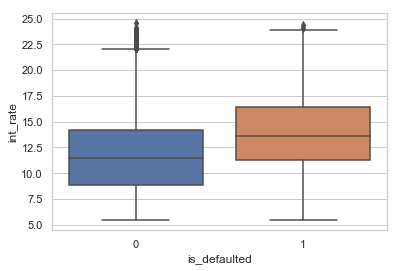

In [41]:
# boxplot of a interest rate against defaulter/non-defaulters
sns.boxplot(x= 'is_defaulted', y = 'int_rate' , data=loan_data)

plt.show()

### Findings:
#### The above plot clearly shows that borrowers who have defaulted tend to have more interest rate for the loaned amount.
#### This indicates that there is something in thier records that the borrower has been charged such high interest rate. The reason can bad credit history or public records etc.

In [42]:
loan_data.groupby('is_defaulted')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
is_defaulted,,,,,,,,
0,34090.00,11.72,3.65,5.42,8.88,11.49,14.17,24.59
1,5627.00,13.82,3.65,5.42,11.31,13.61,16.40,24.40


### Default vs. Non-Default % by State

In [43]:
loan_data_state = loan_data.groupby(['addr_state','is_defaulted'])['addr_state'].count().unstack()
loan_data_state.columns = ['Non-Defaulted','Defaulted']
loan_data_state['Default-Perc'] = (loan_data_state['Defaulted']/(loan_data_state['Defaulted'] + loan_data_state['Non-Defaulted']))*100
loan_data_state['Non-Default-Perc'] = (loan_data_state['Non-Defaulted']/(loan_data_state['Defaulted'] + loan_data_state['Non-Defaulted']))*100
loan_data_state = pd.DataFrame(loan_data_state.to_records())
loan_data_state.sort_values('Default-Perc', ascending=False, inplace=True)
loan_data_state

,addr_state,Non-Defaulted,Defaulted,Default-Perc,Non-Default-Perc
28,NE,2.00,3.00,60.00,40.00
32,NV,389.00,108.00,21.73,78.27
40,SD,52.00,12.00,18.75,81.25
0,AK,65.00,15.00,18.75,81.25
9,FL,2362.00,504.00,17.59,82.41
13,ID,5.00,1.00,16.67,83.33
24,MO,572.00,114.00,16.62,83.38
11,HI,146.00,28.00,16.09,83.91
31,NM,159.00,30.00,15.87,84.13
4,CA,5974.00,1125.00,15.85,84.15


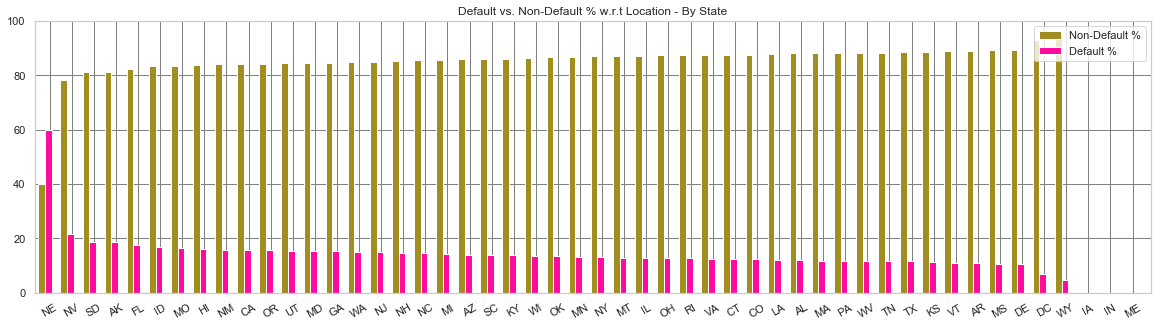

In [44]:
pos=list(range(len(loan_data_state)))
width=0.30

# plotting the bars
fig, ax = plt.subplots(figsize=(20,5))

width=0.30
plt.bar(pos, loan_data_state['Non-Default-Perc'], width,  color='#A28D20')
plt.bar([p + width for p in pos], loan_data_state['Default-Perc'],width, color='#FF0BA0') 

ax.set_title('Default vs. Non-Default % w.r.t Location - By State')
ax.set_xticks([p + 1.2 * width for p in pos])
ax.set_xticklabels(loan_data_state['addr_state'],rotation='30')
ax.grid(b=True, which='major', color='Grey')

plt.xlim(min(pos)-width,max(pos)+width*4)
plt.ylim([0,100])

plt.legend(['Non-Default %','Default %'],loc='upper right')
plt.show()

### Findings:
#### Loan applicants from State NE seems to have high defaulters and hence it requires further analysis on this state to understand additional insights
#### Lending club may look additional parameters to approve loans for applicants from the state NE.

### Lenght of Credit History on Applicant's Issue Date

In [45]:
import datetime
dd = datetime.datetime.strptime('Dec-11','%b-%y')
dd

datetime.datetime(2011, 12, 1, 0, 0)

In [46]:
# function to covert string date format mmm-yy to proper date format.
# Assuming the day is set to 1st day

def convertToDate(strDate):
    return datetime.datetime.strptime(strDate,'%b-%y')

loan_data['issue_date'] = loan_data['issue_d'].apply(lambda x:convertToDate(x))
loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line'].apply(lambda x:convertToDate(x))
loan_data[['issue_date','earliest_cr_line_date']]
# add a new column to look at applicant's credit history in terms of # of years
from dateutil.relativedelta import relativedelta

def diffYears(a,b):
    return relativedelta(a,b).years

loan_data['credit_history_years']=loan_data.apply(lambda x: diffYears(x['issue_date'],x['earliest_cr_line_date']),axis=1)

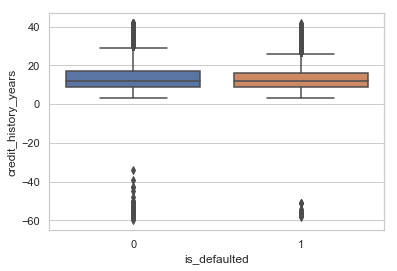

In [47]:
loan_data['credit_history_years']

sns.boxplot(x= 'is_defaulted', y = 'credit_history_years' , data=loan_data)
plt.show()

In [48]:
loan_data.groupby('is_defaulted')['credit_history_years'].describe()

,count,mean,std,min,25%,50%,75%,max
is_defaulted,,,,,,,,
0,34090.00,13.17,7.39,-60.00,9.00,12.00,17.00,42.00
1,5627.00,12.72,7.49,-58.00,9.00,12.00,16.00,42.00


### Default by Grade

In [49]:
loan_data_grade = loan_data.groupby(['grade','is_defaulted'])['grade'].count().unstack()
loan_data_grade.columns = ['Non-Defaulted','Defaulted']
loan_data_grade['Default-Perc'] = (loan_data_grade['Defaulted']/(loan_data_grade['Defaulted'] + loan_data_grade['Non-Defaulted']))*100
loan_data_grade['Non-Default-Perc'] = (loan_data_grade['Non-Defaulted']/(loan_data_grade['Defaulted'] + loan_data_grade['Non-Defaulted']))*100
loan_data_grade = pd.DataFrame(loan_data_grade.to_records())
loan_data_grade.sort_values('Default-Perc', ascending=False, inplace=True)
loan_data_grade

,grade,Non-Defaulted,Defaulted,Default-Perc,Non-Default-Perc
6,G,215,101,31.96,68.04
5,F,730,319,30.41,69.59
4,E,2127,715,25.16,74.84
3,D,4189,1118,21.07,78.93
2,C,6751,1347,16.63,83.37
1,B,10595,1425,11.86,88.14
0,A,9483,602,5.97,94.03


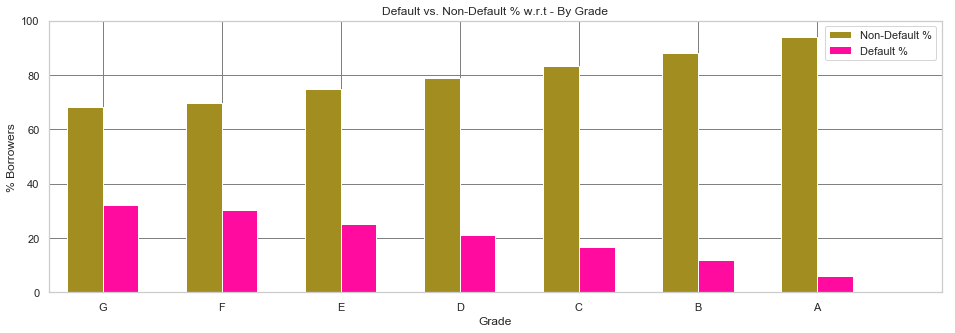

In [50]:
pos=list(range(len(loan_data_grade)))
width=0.30

# plotting the bars
fig, ax = plt.subplots(figsize=(16,5))

width=0.30
plt.bar(pos, loan_data_grade['Non-Default-Perc'], width,  color='#A28D20')
plt.bar([p + width for p in pos], loan_data_grade['Default-Perc'],width, color='#FF0BA0') 

ax.set_title('Default vs. Non-Default % w.r.t - By Grade')
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(loan_data_grade['grade'],rotation='0')
ax.grid(b=True, which='major', color='Grey')

plt.xlim(min(pos)-width,max(pos)+width*4)
plt.ylim([0,100])
plt.ylabel('% Borrowers')
plt.xlabel('Grade')

plt.legend(['Non-Default %','Default %'],loc='upper right')
plt.show()